In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv') 
df_test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
df_greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

In [3]:
df_train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [4]:
df_greeks

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [5]:
df_train.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [6]:
df_train.shape

(617, 58)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


98.32873688509873
61.642115


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


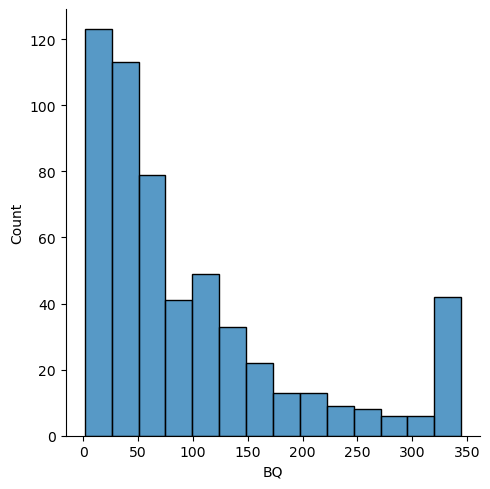

In [7]:
import seaborn as sns
not_null= df_train[df_train['BQ'].notnull()]['BQ']
sns.displot(not_null)
bq_median=np.median(not_null)
print(np.mean(not_null))
print(np.median(not_null))

69.58259579622981
71.949306


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


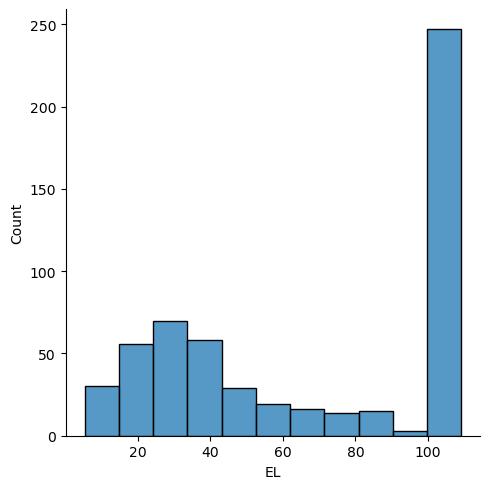

In [8]:
not_null= df_train[df_train['EL'].notnull()]['EL']

sns.displot(not_null)
cb_median=np.median(not_null)
print(np.mean(not_null))
print(np.median(not_null))

In [9]:
newcol=df_train.columns.tolist()
newcol.remove('BQ') 
newcol.remove('EL')

In [10]:
print(newcol)

['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG', 'EH', 'EJ', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class']


In [11]:
for i in newcol:
    df_train.dropna(subset=i, inplace=True)

In [12]:
df_train['BQ'].replace(np.nan,bq_median,inplace=True)
df_train['EL'].replace(np.nan,cb_median,inplace=True)

In [13]:
#one_hot_encoded = pd.get_dummies(df_train['EJ'])
#new_df=pd.concat([df_train,one_hot_encoded],axis=1)
df_train['EJ'].replace({'A': 0, 'B': 1}, inplace=True)
new_df=df_train

In [14]:
#X=new_df.drop(['Id','Class','EJ'],axis=1)
X=new_df.drop(['Id','Class'],axis=1)
y=new_df['Class']

In [15]:
new_df['EJ']

0      1
1      0
2      1
3      1
4      1
      ..
612    0
613    1
614    0
615    1
616    0
Name: EJ, Length: 612, dtype: int64

In [16]:
#X=X.drop('B',axis=1)

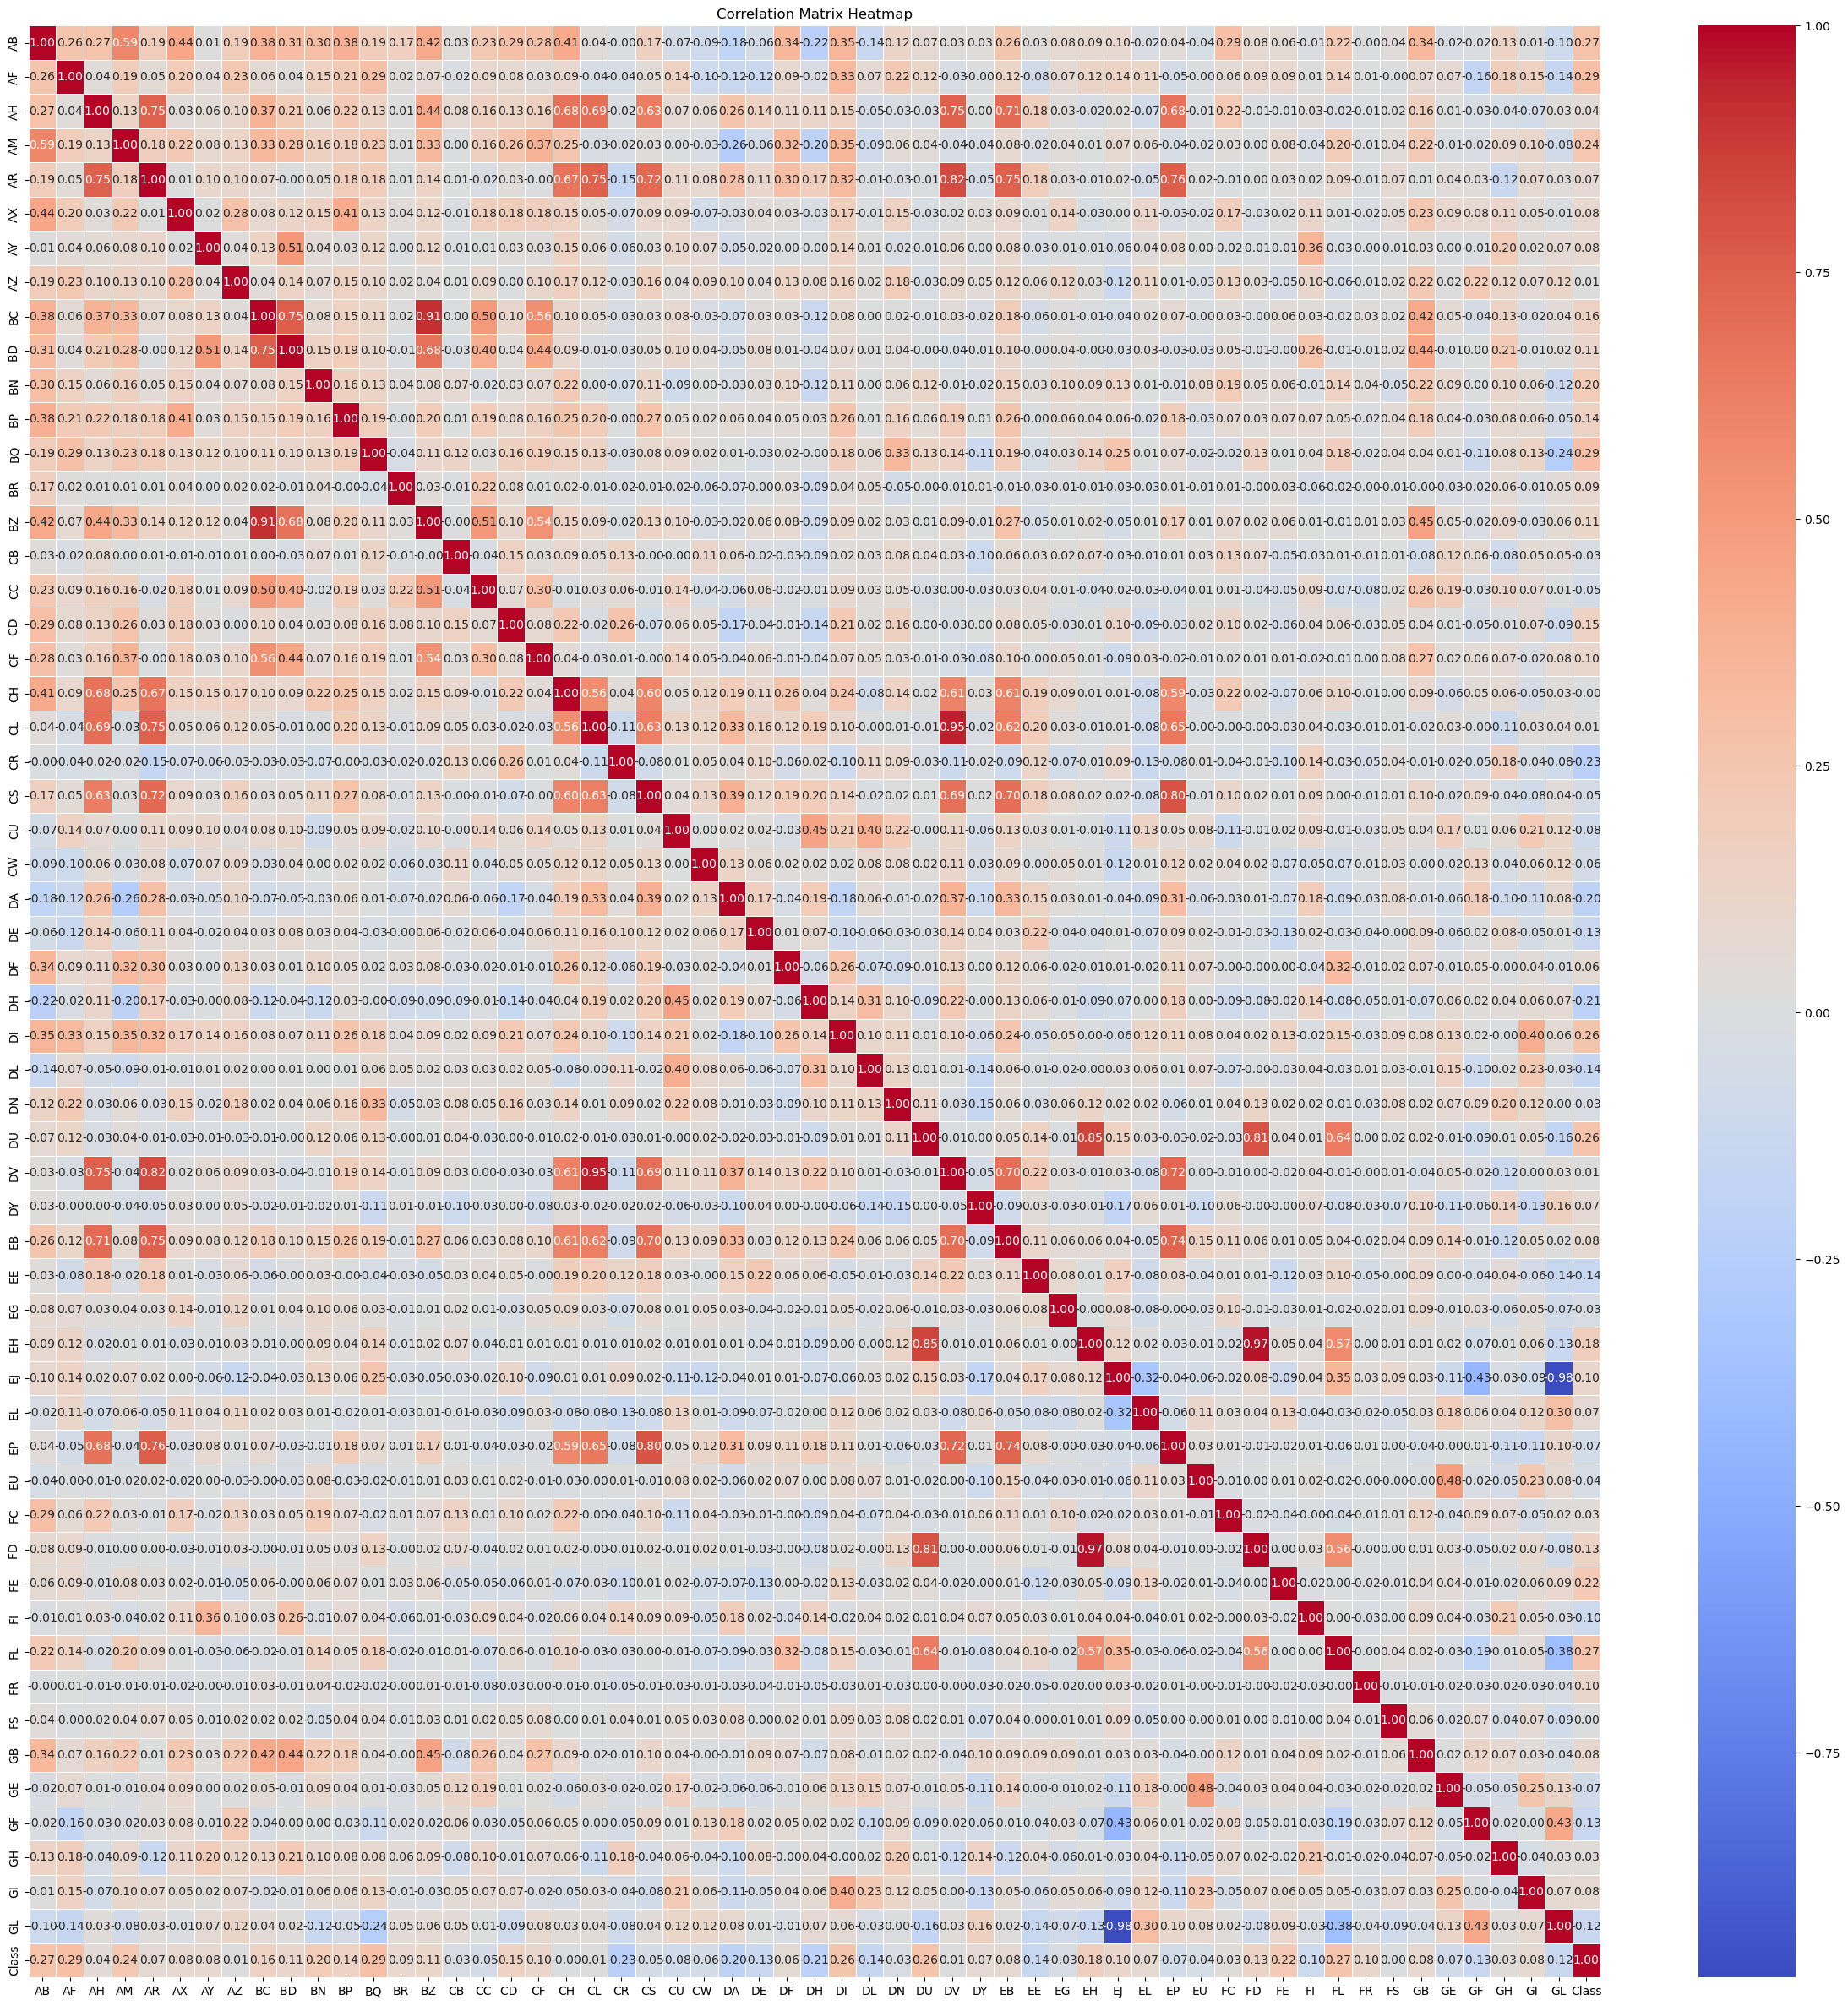

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
thisis=new_df.drop(['Id'],axis=1)
correlation_matrix = thisis.corr()

# Create the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
X_columns=X.columns
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_columns)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import pandas as pd

# Assuming 'X' is your feature matrix and 'X_columns' contains the column names
# Create an initial DataFrame to store the VIF values
vif = pd.DataFrame()

# Initialize a flag to keep track of whether any VIF is greater than or equal to 10
vif_greater_than_10 = True

while vif_greater_than_10:
    # Calculate the VIF for each feature in 'X'
    vals = [VIF(X.values, i) for i in range(X.shape[1])]
    
    # Create a DataFrame with the VIF values and their corresponding column names
    vif = pd.DataFrame({'VIF': vals}, index=X_columns)
    
    # Check if any VIF value is greater than or equal to 10
    vif_greater_than_10 = any(vif['VIF'] >= 10)
    
    # If any VIF value is greater than or equal to 10, find the column with the highest VIF and drop it
    if vif_greater_than_10:
        highest_vif_column = vif['VIF'].idxmax()
        X = X.drop(columns=[highest_vif_column])
        X_columns = X_columns.drop(highest_vif_column)

# Print the final DataFrame containing VIF values for each remaining feature
print(vif)


          VIF
AB   6.530409
AF   4.919198
AH   7.395110
AM   2.705714
AY   1.120128
AZ   9.072846
BC   6.635219
BP   3.586274
BQ   2.832361
BR   1.113995
BZ   7.714967
CB   1.407632
CD   6.267896
CF   2.983324
CL   4.369537
CR   8.558840
CU   8.871461
CW   4.945894
DA   8.848526
DE   2.973332
DF   1.803908
DI   7.153501
DU   4.019668
DY   3.471906
EE   4.267208
EG   2.057405
EL   5.507166
EP   8.154662
EU   1.419043
FC   1.628599
FD   3.231794
FE   1.942368
FL   3.238826
FR   1.014568
FS   1.172757
GB   7.922665
GE   2.656882
GF   2.368787
GI   4.207680
GL   3.349858


In [20]:
columns_= vif.index.tolist()
print(columns_)
newX = X[columns_]


['AB', 'AF', 'AH', 'AM', 'AY', 'AZ', 'BC', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CD ', 'CF', 'CL', 'CR', 'CU', 'CW ', 'DA', 'DE', 'DF', 'DI', 'DU', 'DY', 'EE', 'EG', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GI', 'GL']


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
X_train,X_test,y_train,y_test= train_test_split(newX,y,test_size=0.2, random_state=42)


In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

import xgboost as xgb
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Define the XGBoost Model
xgb_classifier = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # Set the appropriate scale_pos_weight
)

cross_val_results = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'log_loss': []
}

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train and evaluate the model on the current fold
    xgb_classifier.fit(X_train_fold, y_train_fold)
    y_val_pred = xgb_classifier.predict(X_val_fold)
    y_val_pred_prob = xgb_classifier.predict_proba(X_val_fold)  # Predict probabilities for log loss

    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    fold_precision = precision_score(y_val_fold, y_val_pred)
    fold_recall = recall_score(y_val_fold, y_val_pred)
    fold_f1 = f1_score(y_val_fold, y_val_pred)
    fold_log_loss = log_loss(y_val_fold, y_val_pred_prob)

    cross_val_results['accuracy'].append(fold_accuracy)
    cross_val_results['precision'].append(fold_precision)
    cross_val_results['recall'].append(fold_recall)
    cross_val_results['f1'].append(fold_f1)
    cross_val_results['log_loss'].append(fold_log_loss)

average_accuracy = sum(cross_val_results['accuracy']) / len(cross_val_results['accuracy'])
average_precision = sum(cross_val_results['precision']) / len(cross_val_results['precision'])
average_recall = sum(cross_val_results['recall']) / len(cross_val_results['recall'])
average_f1 = sum(cross_val_results['f1']) / len(cross_val_results['f1'])
average_log_loss = sum(cross_val_results['log_loss']) / len(cross_val_results['log_loss'])

print("Average Accuracy on Cross-Validation:", average_accuracy)
print("Average Precision on Cross-Validation:", average_precision)
print("Average Recall on Cross-Validation:", average_recall)
print("Average F1 Score on Cross-Validation:", average_f1)
print("Average Log Loss on Cross-Validation:", average_log_loss)

# Step 6: Train the Final Model
xgb_classifier.fit(X_train, y_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate log loss on the test set (using the predicted probabilities)
y_test_pred_prob = xgb_classifier.predict_proba(X_test)
test_log_loss = log_loss(y_test, y_test_pred_prob)

# Print the evaluation metrics on the test set
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test Log Loss:", test_log_loss)
#Average Log Loss on Cross-Validation: 0.25219136301423134 test size=0.2
# Average Log Loss on Cross-Validation: 0.2594667476352289 test size=0.3 Average Log Loss on Cross-Validation: 0.2609837487290932 testsize=0.4
#Test Log Loss: 0.2636906315490432 test=0.3 Test Log Loss: 0.2125547104271738 testsize=0.4 Test Log Loss: 0.3707644624310862 testsize=0.2

Average Accuracy on Cross-Validation: 0.9202608878602987
Average Precision on Cross-Validation: 0.8187684438323825
Average Recall on Cross-Validation: 0.7479761904761905
Average F1 Score on Cross-Validation: 0.7795608840980892
Average Log Loss on Cross-Validation: 0.25219136301423134
Test Accuracy: 0.8699186991869918
Test Precision: 0.5714285714285714
Test Recall: 0.8
Test F1 Score: 0.6666666666666666
Test Log Loss: 0.3707644624310862


In [23]:
most_common_category = df_test['EJ'].mode()[0]
df_test['EJ'].replace({'A': 0, 'B': 1}, inplace=True)
median_values = df_test.median()
df_test.fillna(median_values, inplace=True)
new_df=df_test
X=new_df.drop(['Id'],axis=1)
X=X[columns_]
y_pred = xgb_classifier.predict(X)
prob_class_0 = xgb_classifier.predict_proba(X)[:, 0]  # Probability for class 0 (not diagnosed)
prob_class_1 = xgb_classifier.predict_proba(X)[:, 1]  # Probability for class 1 (diagnosed)
# Create a new DataFrame containing 'Id', 'class 0', and 'class 1'
result_df = pd.DataFrame({'Id': df_test['Id'], 'class_0': prob_class_0, 'class_1': prob_class_1})
# Save the DataFrame to a CSV file
result_df.to_csv('submission.csv', index=False)

/tmp/ipykernel_20/1942241952.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df_test.median()


In [24]:
result_df.head(15)

,Id,class_0,class_1
0,00eed32682bb,0.907044,0.092956
1,010ebe33f668,0.907044,0.092956
2,02fa521e1838,0.907044,0.092956
3,040e15f562a2,0.907044,0.092956
4,046e85c7cc7f,0.907044,0.092956


In [25]:
df_greeks

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [26]:
trying=  pd.merge(df_train, df_greeks, on='Id', how='inner')

In [27]:
trying

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,8095.932828,24.640462,69.191944,21.978000,0,A,B,M,B,9/13/2020
608,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,3085.308063,29.648928,124.808872,0.145340,0,A,B,M,B,9/8/2020
609,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,6474.652866,26.166072,119.559420,21.978000,0,A,C,M,B,7/24/2019
610,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,1965.343176,25.116750,37.155112,0.184622,0,A,C,M,B,1/31/2019


In [28]:
yp=pd.get_dummies(trying['Alpha'])
yp

,A,B,D,G
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
607,1,0,0,0
608,1,0,0,0
609,1,0,0,0
610,1,0,0,0


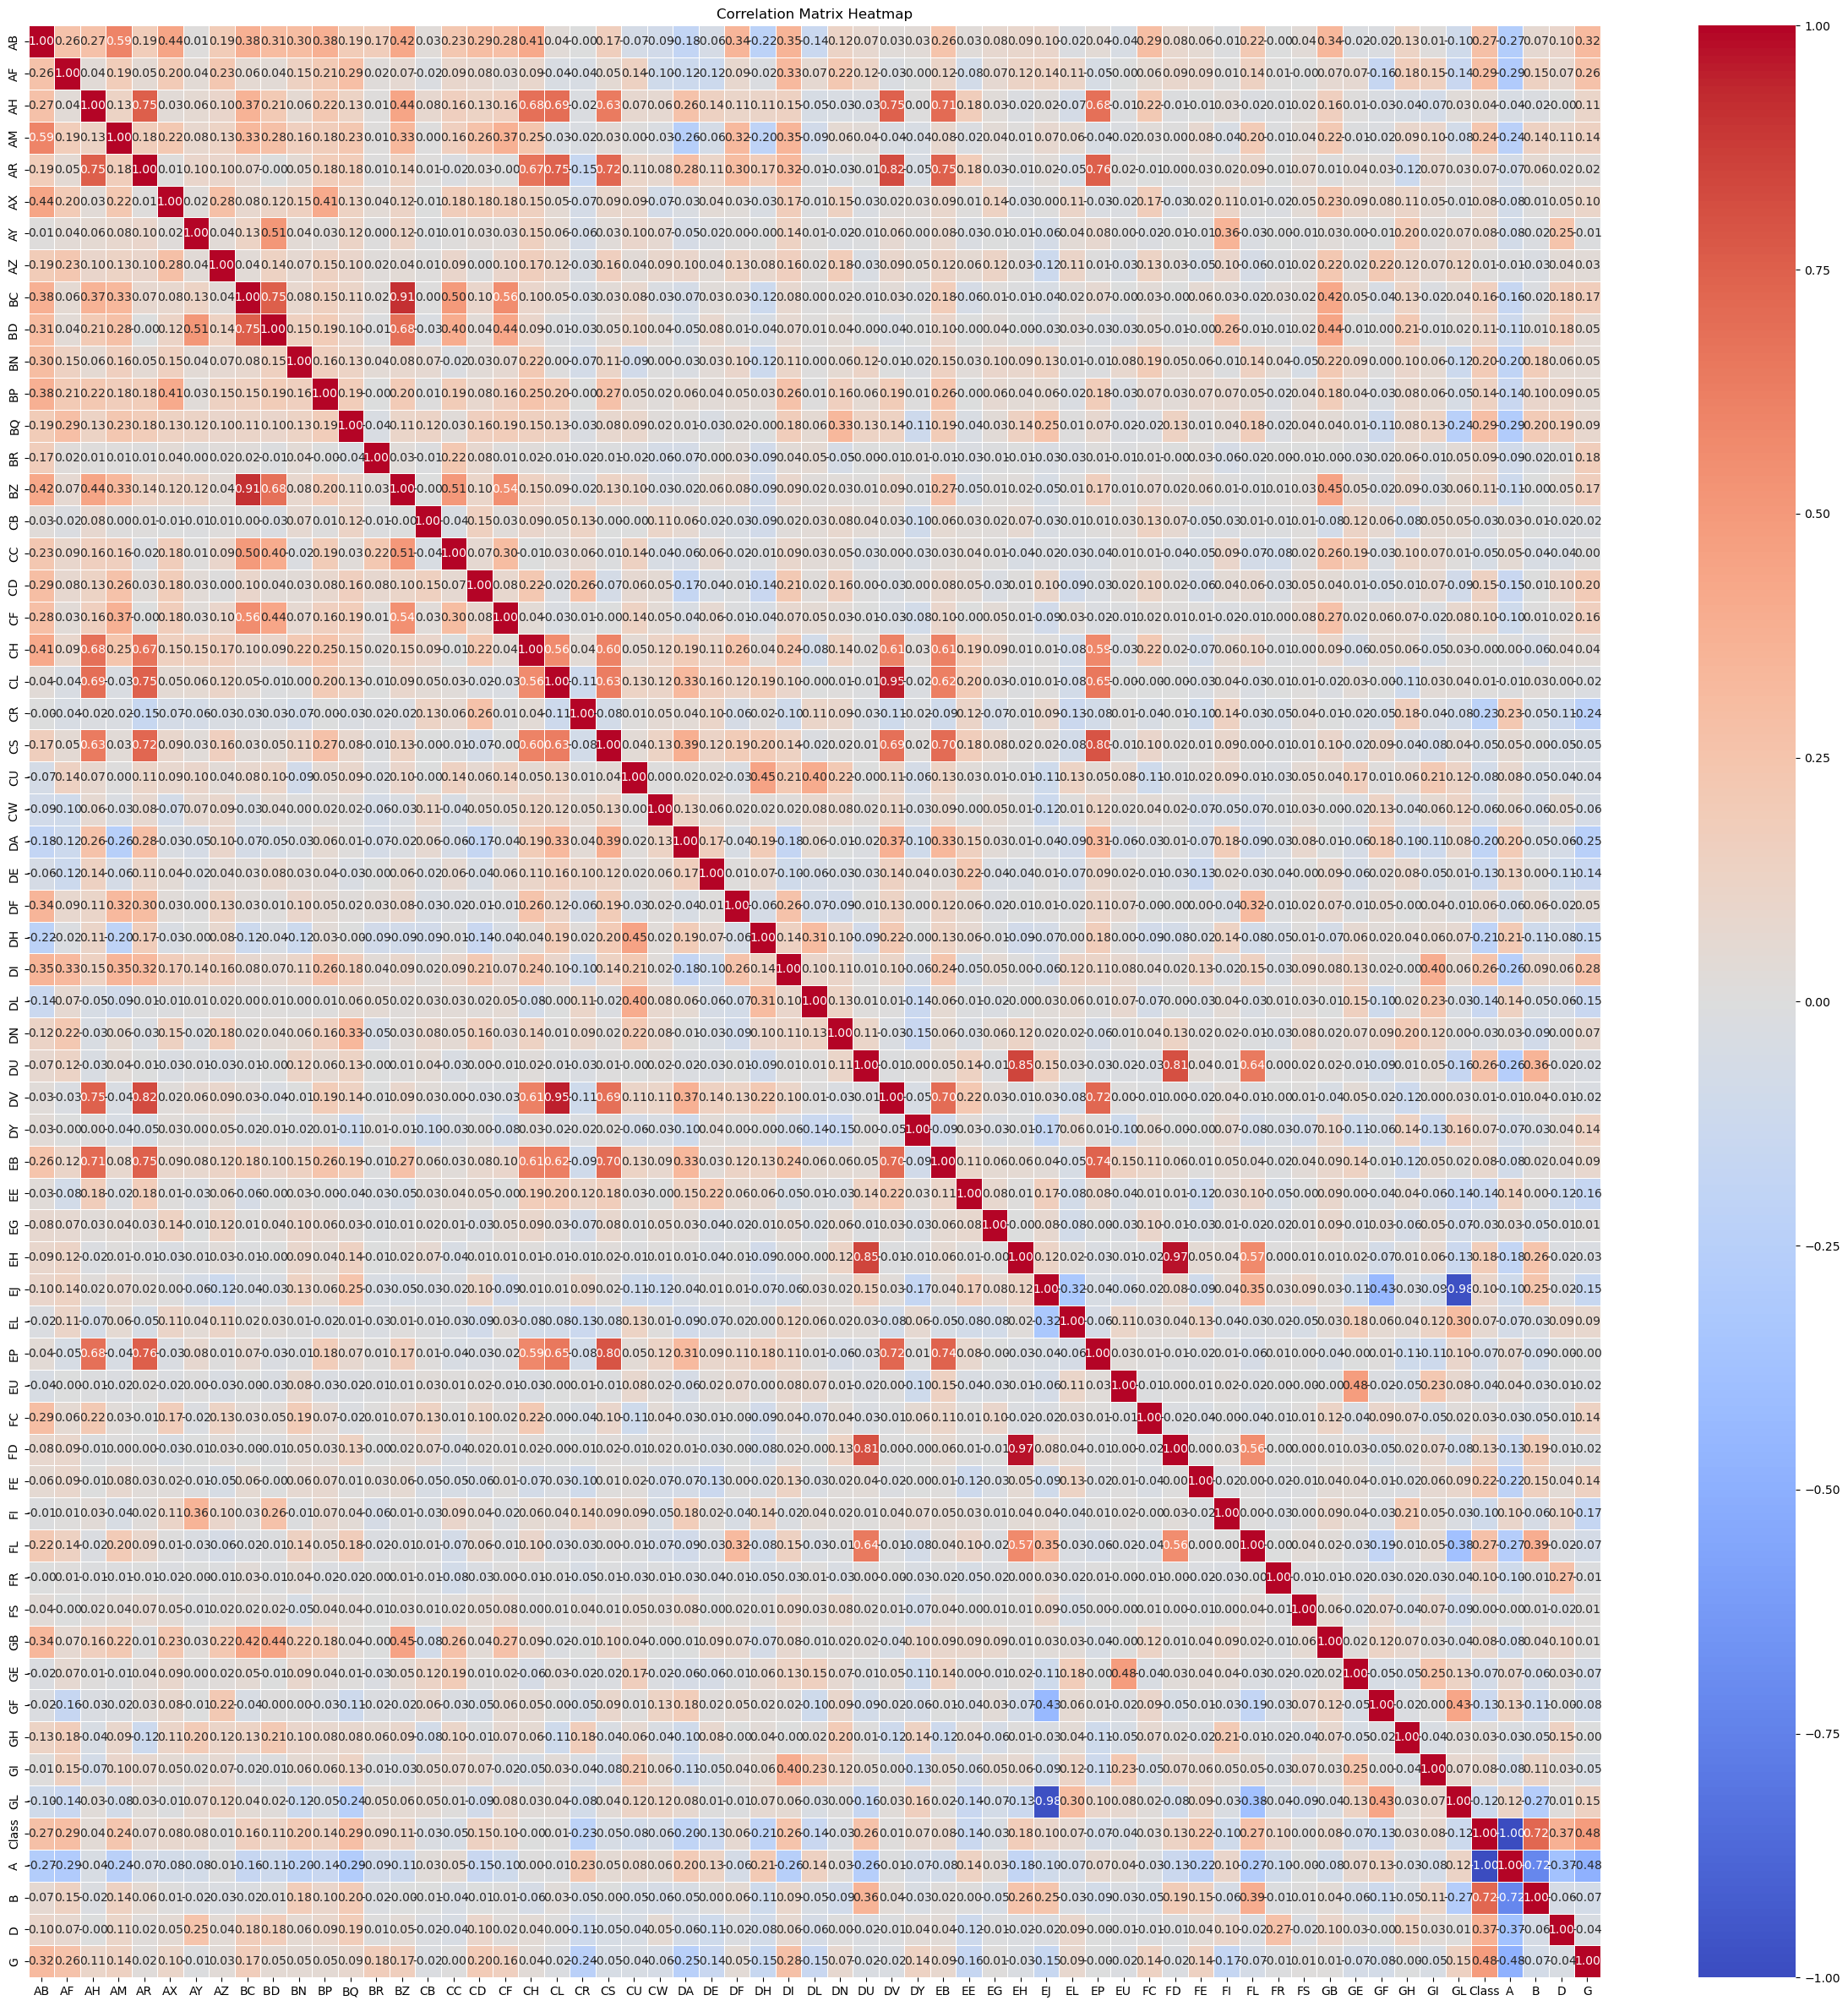

In [29]:
news=trying.drop(['Alpha','Id','Beta','Gamma','Delta', 'Epsilon'],axis=1)

#new_df=pd.concat([df_train,one_hot_encoded],axis=1)
news=pd.concat([news,yp],axis=1)
correlation_matrix = news.corr()

# Create the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
